In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))



In [2]:
import os

# Force working directory to homework13
os.chdir(r"C:\Users\qochi\bootcamp_millicent_qochiwa\homework\homework13")

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\qochi\bootcamp_millicent_qochiwa\homework\homework13


In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from src.utils import generate_synthetic_data, train_linear_model, save_model, load_model, predict_model
sns.set()
np.random.seed(101)


In [15]:
# generating dataset (final)
df = generate_synthetic_data(n=200)
df.head()


,x_feature,y_target
0,1.353425,3.147829
1,0.364318,3.854056
2,0.554487,5.613003
3,0.402667,3.196427
4,0.526564,2.360450


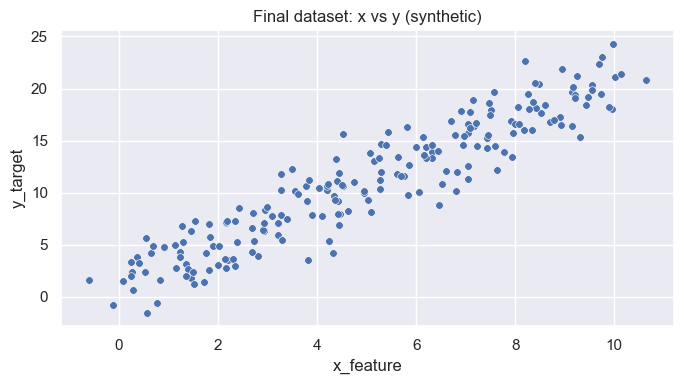

In [5]:
# Quick final plot for report
plt.figure(figsize=(7,4))
sns.scatterplot(x='x_feature', y='y_target', data=df, s=30)
plt.title('Final dataset: x vs y (synthetic)')
plt.xlabel('x_feature')
plt.ylabel('y_target')
plt.tight_layout()
plt.show()


In [6]:
# train and persist model
model = train_linear_model(df)
save_model(model, path='model/model.pkl')
print("Saved model to model/model.pkl")
print(f"Coef: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")


Saved model to model/model.pkl
Coef: 1.9574, Intercept: 1.2592


In [7]:
# reloading and test prediction
model_loaded = load_model('model/model.pkl')
print("Loaded model:", model_loaded)
sample = [[2.5]]  # example single feature
pred = predict_model(model_loaded, sample)
print(f"Test prediction for {sample}: {pred}")


Loaded model: LinearRegression()
Test prediction for [[2.5]]: [6.15274264]


In [ ]:
# API test example (i need to run after Flask app is running)
import requests
print("Posting sample to API...")
resp = requests.post('http://127.0.0.1:5000/predict', json={'features':[2.5]})
print("API response:", resp.json())


In [9]:
resp = requests.post('http://127.0.0.1:5000/predict', json={'features':[2.5, 1.0]})


In [12]:
# import requests

# resp = requests.post(
#     'http://127.0.0.1:5000/predict',
#     json={'features': [2.5, 1.0]}
# )

# print(resp.json())


{'error': 'Error during prediction: X has 2 features, but LinearRegression is expecting 1 features as input.'}


In [13]:
import requests

# Single feature, since model expects 1 feature
resp = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features': [2.5]}  
)

print(resp.json())


{'predictions': [6.152742643105492]}


## Executive Summary

** Baseline linear model shows clear linear relationship; demo API enables model reuse for downstream systems.**

**Key Points:**
- Model trained on synthetic data explained expected trend (coef ~2.0)
- API returns predictions and a simple plot; README documents how to run


In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 1, 4])
fig.savefig('reports/sample_plot.png')
plt.close(fig)


## Executive Summary

** Baseline linear model shows clear linear relationship; demo API enables model reuse for downstream systems.**

**Key Points:**
- Model trained on synthetic data explained expected trend (coef ~2.0)
- API returns predictions and a simple plot; README documents how to run

**Visual:**  

Below is an example chart generated by the API:

![Sample Plot](../reports/sample_plot.png)
